In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import random
import math
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
from tqdm import tqdm
import threading
import queue

In [2]:
def distance(x1, y1, x2, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5
def contact_prob(distance, contact_density,x1, y1, x2, y2):
    d = distance(x1, y1, x2, y2)
    return math.exp(-d/contact_density)

In [3]:
def initialize_graph(node_count, distance = distance, contact_density = 1, queue = None, time = 0):
    square_size = math.sqrt(node_count) #size of square
    custom_pos = {} #custom position for plotting
    G = nx.Graph(time = time) #initialize graph
    for i in range(node_count):
        G.add_node(i)
        G.nodes[i]['state'] = 'S'  
        x,y = random.uniform(0, square_size), random.uniform(0, square_size)
        G.nodes[i]['pos'] = (x,y)
        G.nodes[i]['observed'] = False
        G.nodes[i]['SIR_prob'] = [1,0,0]
        custom_pos[i] = (x,y)
    #initialize node state, color, and position
    #set the colors
    #S = susceptible (green)
    #I = infected (red)
    #R = recovered (blue)
    #set the edges
    edges = nx.geometric_edges(G, radius = contact_density)
    G.add_edges_from(edges)
    queue.put((G, custom_pos))

In [4]:
def infectRandomNode(G, node_count):
    #infect a random node that is susceptible
    sample = random.sample(range(node_count), node_count)
    for i in sample:
        if G.nodes[i]['state'] == 'S':
            G.nodes[i]['state'] = 'I'
            break

In [5]:
def update(G, infection_rate, recovery_rate):
    #infect susceptible nodes that are in contact with infected nodes
    new_G = G.copy()
    for node in G.nodes():
        if G.nodes[node]['state'] == 'S':
            for neighbor in G.neighbors(node):
                if G.nodes[neighbor]['state'] == 'I':
                    if random.uniform(0, 1) < infection_rate:
                        new_G.nodes[node]['state'] = 'I'
                        break
        elif G.nodes[node]['state'] == 'I':
            if random.uniform(0, 1) < recovery_rate:
                new_G.nodes[node]['state'] = 'R'
    return new_G
        


In [6]:
def SurroundInfectionRate(graph, node, infection_rate):
    neighbors = list(graph.neighbors(node))
    result = 0
    for neighbor in neighbors:
        result += infection_rate * graph.nodes[neighbor]['SIR_prob'][1]
    return result

In [7]:
def MeanFieldInference(graph_t, infection_rate, recovery_rate):
    predicted_state_t1 = {}
    for node in graph_t.nodes():
        factor = SurroundInfectionRate(graph_t, node, infection_rate)
        Ps = graph_t.nodes[node]['SIR_prob'][0]*(1-factor)
        Pi = (1-recovery_rate)*graph_t.nodes[node]['SIR_prob'][1] + graph_t.nodes[node]['SIR_prob'][0]*factor
        Pr = graph_t.nodes[node]['SIR_prob'][2] + recovery_rate*graph_t.nodes[node]['SIR_prob'][1]
        predicted_state_t1[node] = [Ps, Pi, Pr]
    return predicted_state_t1


In [8]:
def BackloopUpdate(temporal_graphs,t ,delta, node, state):
    mapper = {'S':[1,0,0], 'I':[0,1,0], 'R':[0,0,1]}
    for i in range(t, t-delta-1, -1):
        temporal_graphs[i].nodes[node]['SIR_prob'] = mapper[state]
        temporal_graphs[i].nodes[node]['observed'] = True

In [9]:
#@param: give a list of nodes that are observed
def DetectObserve(obs, temporal_graphs, t, delta):
    for entry in obs:
        state = temporal_graphs[t].nodes[entry[0]]['state']
        if state == 'S':
            BackloopUpdate(temporal_graphs, t, delta, entry[0], 'S')
        elif state == 'I':
            BackloopUpdate(temporal_graphs, t, delta, entry[0], 'I')
        elif state == 'R':
            BackloopUpdate(temporal_graphs, t, delta, entry[0], 'R')

In [10]:
def SetRemove(graph, nodes):
    for entry in nodes:
        graph.nodes[entry]['observed'] = True
        graph.nodes[entry]['SIR_prob'] = [0,0,1]
        graph.nodes[entry]['state'] = 'R'

In [11]:
def SIR_count(graph):
    S_count = 0
    I_count = 0
    R_count = 0
    for node in graph.nodes():
        if graph.nodes[node]['state'] == 'S':
            S_count += 1
        elif graph.nodes[node]['state'] == 'I':
            I_count += 1
        elif graph.nodes[node]['state'] == 'R':
            R_count += 1
    return S_count, I_count, R_count

In [12]:
def Sampler(graph, s_count):
    nodes = list(graph.nodes())
    random.shuffle(nodes)
    result = []
    count = 0
    for i in range(len(nodes)):
        if graph.nodes[nodes[i]]['observed']:
            result.append(nodes[i])
            count += 1
        if count == s_count:
            break
    return result

In [13]:

que_graphs = queue.Queue()
thread_list = []
for t in range(1, 80):
    thread = threading.Thread(target=initialize_graph, args=(10000, distance, 6, que_graphs, t), name='thread'+str(t))
    thread.start()
    print('thread'+str(t)+' started')
    thread_list.append(thread)

for thread in thread_list:
    print('thread'+thread.name +' joined')
    thread.join()
temporal_graph_dict = {}
while not que_graphs.empty():
    G,custom_pos = que_graphs.get()
    temporal_graph_dict[G.graph['time']] = (G, custom_pos)

thread1 started
thread2 started
thread3 started
thread4 started
thread5 started
thread6 started
thread7 started
thread8 started
thread9 started
thread10 started
thread11 started
thread12 started
thread13 started
thread14 started
thread15 started
thread16 started
thread17 started
thread18 started
thread19 started
thread20 started
thread21 started
thread22 started
thread23 started
thread24 started
thread25 started
thread26 started
thread27 started
thread28 started
thread29 started
thread30 started
thread31 started
thread32 started
thread33 started
thread34 started
thread35 started
thread36 started
thread37 started
thread38 started
thread39 started
thread40 started
thread41 started
thread42 started
thread43 started
thread44 started
thread45 started
thread46 started
thread47 started
thread48 started
thread49 started
thread50 started
thread51 started
thread52 started
thread53 started
thread54 started
thread55 started
thread56 started
thread57 started
thread58 started
thread59 started
thread

In [14]:
#mode = 'MF', 'R', 'None'
node_count = 500000
infection_rate = 0.05
recovery_rate = 0.02
contact_density = 6
time_steps = 80
temporal_graph_dict = {}
observe_per_day = 1500
t_mf = 5
color_map = {'S': 'green', 'I': 'red', 'R': 'blue'}
def sim(DataFrame, id, mode):
    graph, custom_pos = initialize_graph(node_count, distance, contact_density)
    infectRandomNode(graph, node_count)
    temporal_graph_dict[0] = graph.copy()
    S, I, R = SIR_count(graph)
    DataFrame.loc[len(DataFrame)] = [id, 0, S, I, R]
    for i in tqdm(range(1, time_steps)):
        graph = update(temporal_graph_dict[i-1], infection_rate, recovery_rate)
        temporal_graph_dict[i] = graph.copy()
        if (mode == 'MF' and i > 10):
            pred = MeanFieldInference(graph, infection_rate, recovery_rate)
            sort_pred = sorted(pred.items(), key=lambda x: x[1])
            node_list = [node[0] for node in sort_pred]
            DetectObserve(sort_pred[:observe_per_day], temporal_graph_dict, i, t_mf)
            SetRemove(temporal_graph_dict[i], node_list[:observe_per_day])
        elif (mode == 'R' and i > 10):
            sample = Sampler(graph, observe_per_day)
            #DetectObserve(sample, temporal_graph_dict, i, t_mf)
            SetRemove(temporal_graph_dict[i], sample)
        S, I, R = SIR_count(graph)
        DataFrame.loc[len(DataFrame)] = [id, i, S, I, R]
    return temporal_graph_dict, custom_pos
    

In [16]:
experiment_R_df = pd.DataFrame(columns=['id', 'time', 'S', 'I', 'R'])
experiment_MF_df = pd.DataFrame(columns=['id', 'time', 'S', 'I', 'R'])

In [19]:
a,b = initialize_graph(node_count, distance, contact_density)

In [20]:
infectRandomNode(a, node_count)

In [21]:
graph = update(a, infection_rate, recovery_rate)

In [22]:
pred = MeanFieldInference(graph, infection_rate, recovery_rate)

In [17]:
temporal_graph_R, custom_pos = sim(experiment_R_df, 0, 'R')
temporal_graph_MF, custom_pos = sim(experiment_MF_df, 0, 'MF')

KeyboardInterrupt: 

In [ ]:
def drawgraph(graph, custom_pos, t):
    graph = temporal_graph_dict[t]
    colors = [color_map[graph.nodes[node]['state']] for node in graph.nodes()]
    nx.draw(graph, pos = custom_pos, node_color = colors, with_labels = True)

In [ ]:
#from ipywidgets import *
#interact(drawgraph, graph = fixed(temporal_graph_dict), custom_pos = fixed(custom_pos), t = widgets.IntSlider(min=0, max=time_steps-1, step=1, value=0))


interactive(children=(IntSlider(value=0, description='t', max=79), Output()), _dom_classes=('widget-interact',…

<function __main__.drawgraph(graph, custom_pos, t)>

In [ ]:
#store the graphs
import pickle
with open('temporal_graph_R.pkl', 'wb') as f:
    pickle.dump(temporal_graph_R, f)
with open('temporal_graph_MF.pkl', 'wb') as f:
    pickle.dump(temporal_graph_MF, f)
with open('custom_pos.pkl', 'wb') as f:
    pickle.dump(custom_pos, f)

In [ ]:
experiment_R_df['I'] = experiment_R_df['I'].apply(lambda x: x/node_count)
experiment_MF_df['I'] = experiment_MF_df['I'].apply(lambda x: x/node_count)

In [ ]:
result_R = experiment_R_df.groupby('time').mean()
result_MF = experiment_MF_df.groupby('time').mean()

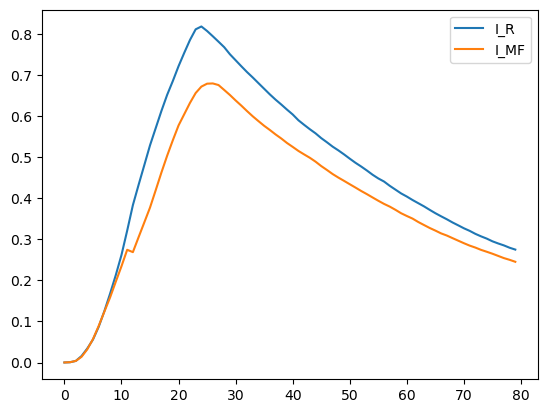

In [ ]:
plt.plot(result_R['I'], label = 'I_R')
plt.plot(result_MF['I'], label = 'I_MF')
plt.legend()